## 1.0 Redes Convolucionales

Las Redes Neuronales Convolucionales (CNN, del inglés Convolutional Neural Networks), son un tipo de red neuronal diseñadas para procesar y analizar datos con una estructura de malla.

Esta arquitectura de red neuronal es mayormente utilizada para problemas relacionados con clasificación de mágenes y para aplicaciones sobre videos, como lo son la detección de objetos.

Las redes convolucionales están compuestas por:

1. Convoluciones: Aplicación de filtros o *Kernels* sobre las imágenes de entrada para obtener las características más relevantes.
2. Pooling: Reducción de dimensión de las salidas de las convoluciones. Ayuda a disminuir el poder de cómputo necesario para su procesamiento.
3. Redes totalmente conectadas: Realizan el procesamiento de las características extradas de las Convoluciones y Pooling para encontrar relaciones entre los datos de entrada y las clases a predecir.




In [ ]:
## Importamos las bibliotecas básicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

## Importamos bibliotecas de Tensorflow y Keras para estructurar redes neuronales
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers

## Procesamiento de imágenes y manejo de directorios
import cv2, os
from scipy.ndimage import maximum_filter, uniform_filter
import shutil

### 1.1 Operación de convolución

La operación de convolución se refiere a la aplicación de un "filtro", comúnmente llamado como *Kernel de convolución*, sobre los datos de entrada, con la finalidad de obtener características específicas de la imágen mediante cada filtro.

La intención de los Kernels de convolución, es que la red neuronal aprenda de patrones como lo son bordes, tecturas, formas, etc. Generalmente las capas de convolución van acompañadas de una capa de *Pooling* que ayuda a reducir la dimensión de las imágenes de entrada, lo que ayuda a la hora del procesamiento de las mismas.

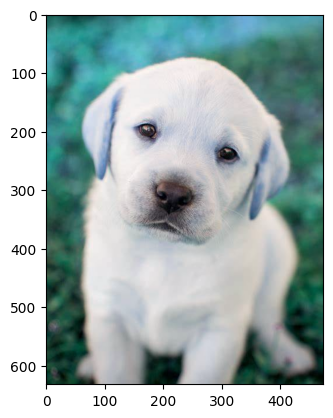

In [ ]:
## Cargamos una imágen de muestra

img = cv2.imread("perrito.jpg")  ## Leemos una imágen en formato jpg
plt.imshow(img)

In [ ]:
img.shape

(632, 474, 3)

In [ ]:
X = Conjunto de datos
X_i = Elemento del conjunto de datos

Y = Conjunto de etiquetas
Y_i = etiqueta

In [ ]:
img

array([[[ 35,  97,  85],
        [ 35,  97,  85],
        [ 35,  97,  85],
        ...,
        [ 83, 159, 182],
        [ 83, 159, 182],
        [ 83, 159, 182]],

       [[ 34,  96,  84],
        [ 34,  96,  84],
        [ 34,  96,  84],
        ...,
        [ 82, 158, 181],
        [ 81, 157, 180],
        [ 81, 157, 180]],

       [[ 33,  94,  84],
        [ 33,  94,  84],
        [ 31,  94,  84],
        ...,
        [ 81, 156, 178],
        [ 80, 155, 177],
        [ 80, 155, 177]],

       ...,

       [[ 16,  53,  37],
        [  4,  43,  27],
        [  2,  41,  25],
        ...,
        [  7,  22,  14],
        [  0,  13,   5],
        [ 14,  27,  19]],

       [[ 29,  65,  49],
        [ 11,  48,  32],
        [  0,  38,  22],
        ...,
        [ 10,  27,  18],
        [ 18,  33,  25],
        [ 39,  54,  46]],

       [[ 41,  77,  61],
        [ 16,  53,  37],
        [  0,  37,  21],
        ...,
        [ 12,  29,  20],
        [ 14,  29,  21],
        [ 37,  52,  44]]

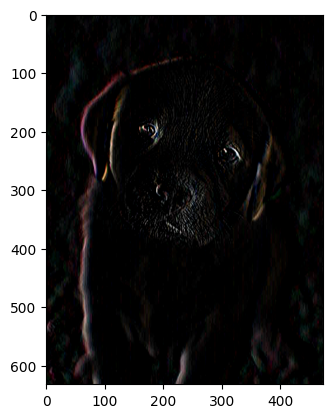

In [ ]:
## Definimos el Kernel de Convolución
kernel_borde = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])

# Aplicar el filtro de convolución con el kernel de detección de bordes
img_edge = cv2.filter2D(img, -1, kernel_borde)
plt.imshow(img_edge)

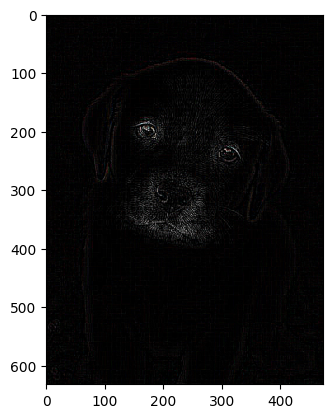

In [ ]:
## Definimos el Kernel de Convolución
kernel_neg = np.array([[-1, -1, -1],
                       [-1, 8,  -1],
                       [-1, -1, -1]])

# Aplicar el filtro de convolución con el kernel
img_neg = cv2.filter2D(img, -1, kernel_neg)
plt.imshow(img_neg)

### 1.2 Pooling

Esta operación es esencial a la hora de realizar arquitecturas de redes neuronales, esto debido a que ayuda a reducir la dimensionalidad de entrada de las imágenes que salen de la capa de convolución, lo que disminuye el poder de cómputo necesario para su procesamiento.

Existen dos tipos de operaciones de Pooling:

* **Max Pooling**: Para un tamaño de filtro de (m,n) que recorre toda la matriz, toma el valor máximo de los elementos de la región que va recorriendo, lo cual ayuda a obtener las características más relevantes de dicha región.

* **Average Pooling**: Para un tamaño de filtro de (m,n) que recorre toda la matriz, toma el promedio de los elementos de la región, lo cual genera un comportamiento de suavizado.

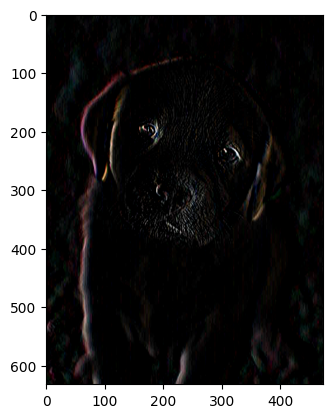

In [ ]:
plt.imshow(img_edge)

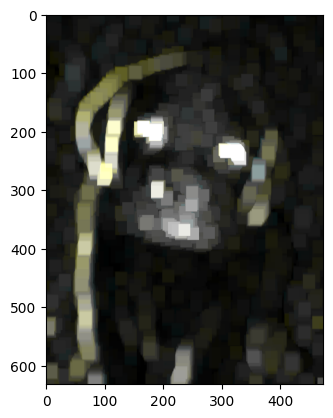

In [ ]:
## Se define el tamaño de la ventana de Pooling

ventana = (20, 20, 3)

## aplicar Max Pooling a la imagen
img_max_pooling = maximum_filter(img_edge, size = ventana)
plt.imshow(img_max_pooling)

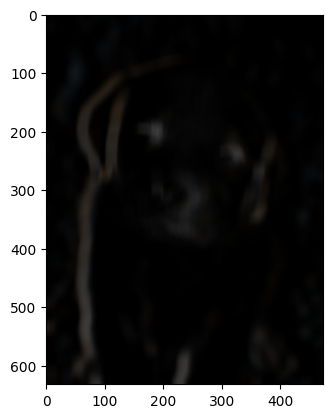

In [ ]:
## aplicar Average Pooling a la imagen para obtener una imágen más suavizada
img_avg_pooling = uniform_filter(img_edge, size = ventana)

plt.imshow(img_avg_pooling)

## 1.3 Declaración de una Red Convolucional

Keras tiene la facilidad de contar con bibliotecas que generan la obtención de conjuntos de entrenamiento y prueba directamente desde directorios.

Esto puede ser posible mediante la herramienta FlowFrom Directory.

En este ejercicio implementaremos una red neuronal convolucional para realizar la clasificación de dos clases. Perros y Gatos. Para ello, descargaremos nuestro conjunto de datos directamente desde el siguiente enlace:



### 1.3.1 Carga y revisión de datos

In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

--2023-11-24 17:29:29--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.147, 16.12.36.123, 52.219.160.199, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  12.6MB/s    in 5.7s    

2023-11-24 17:29:36 (10.1 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



In [ ]:
## Revisamos el contenido de la carpeta

ruta_train_cat = "/content/datset/training/cat/"
ruta_train_dog = "/content/datset/training/dog/"

print("Número de imágenes de gatos: ", len(os.listdir(ruta_train_cat)))
print("Número de imágenes de perros: ", len(os.listdir(ruta_train_dog)))

Número de imágenes de gatos:  12414
Número de imágenes de perros:  12409


In [ ]:
names_cats = os.listdir(ruta_train_cat)
names_dogs = os.listdir(ruta_train_dog)

## Revisamos las dimensiones de las imágenes
print("Dimensión imágenes de gatos: ", cv2.imread(os.path.join(ruta_train_cat, names_cats[0])).shape)
print("Dimensión imágenes de perros: ", cv2.imread(os.path.join(ruta_train_dog, names_dogs[0])).shape)

Dimensión imágenes de gatos:  (50, 50, 3)
Dimensión imágenes de perros:  (50, 50, 3)


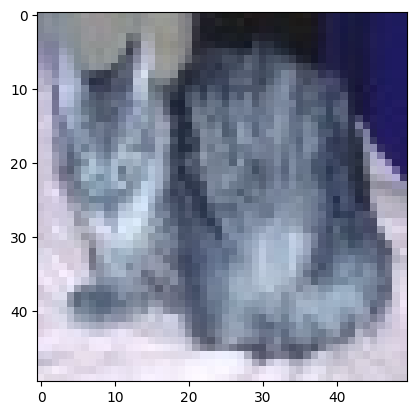

In [ ]:
## Visualizamos las imágenes

muestra_cat = cv2.imread(os.path.join(ruta_train_cat, names_cats[2]))
plt.imshow(muestra_cat)

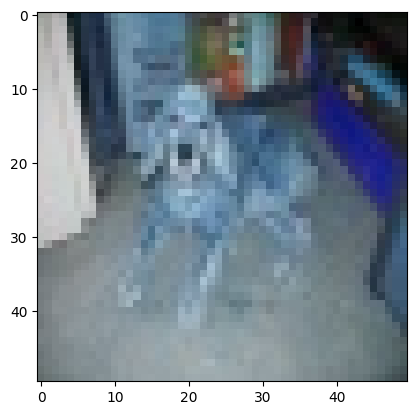

In [ ]:
muestra_dog = cv2.imread(os.path.join(ruta_train_dog, names_dogs[1]))
plt.imshow(muestra_dog)

### 3.1.2 Definir los conjuntos de entrenamiento y validación

In [ ]:
## Establecemos las rutas de entrenamiento y prueba
train_dir= "./datset/training"
test_dir= "./datset/testing/"

## Definimos los generator de
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split = 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
valid_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')


Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


### 3.1.3 Declaración del modelo secuencial y las capas de convolución

In [ ]:
# Declaramos el modelo Secuencial
model = tf.keras.models.Sequential()

# Aplicamos la primera capa de Convolución y Pooling
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# Segunda capa de Convolución y Pooling
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# Aplanamiento de datos
model.add(tf.keras.layers.Flatten())

# Capa totalmente conectada
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Capa de salida
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
# Generamos la compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=valid_generator, validation_steps=50)

Epoch 1/20


<ipython-input-30-3940dc4b27ed>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=valid_generator, validation_steps=50)


993/993 [==============================] - 25s 14ms/step - loss: 0.6096 - accuracy: 0.6624 - val_loss: 0.5762 - val_accuracy: 0.7300
Epoch 2/20
993/993 [==============================] - 14s 14ms/step - loss: 0.5152 - accuracy: 0.7470 - val_loss: 0.5044 - val_accuracy: 0.7580
Epoch 3/20
993/993 [==============================] - 14s 14ms/step - loss: 0.4728 - accuracy: 0.7713 - val_loss: 0.5184 - val_accuracy: 0.7530
Epoch 4/20
993/993 [==============================] - 14s 14ms/step - loss: 0.4313 - accuracy: 0.7994 - val_loss: 0.4950 - val_accuracy: 0.7620
Epoch 5/20
993/993 [==============================] - 14s 15ms/step - loss: 0.3921 - accuracy: 0.8215 - val_loss: 0.4839 - val_accuracy: 0.7820
Epoch 6/20
993/993 [==============================] - 13s 13ms/step - loss: 0.3497 - accuracy: 0.8431 - val_loss: 0.4794 - val_accuracy: 0.7790
Epoch 7/20
993/993 [==============================] - 12s 12ms/step - loss: 0.2996 - accuracy: 0.8699 - val_loss: 0.5170 - val_accuracy: 0.7770
Epo

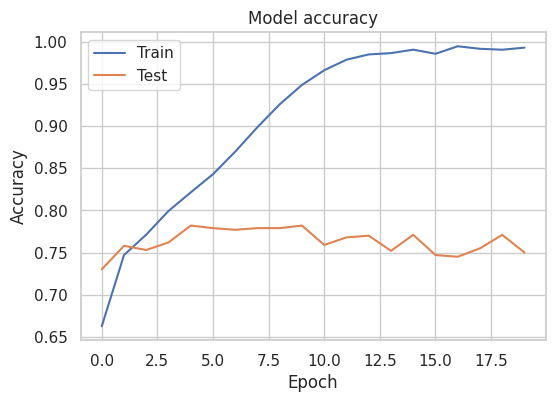

In [ ]:
# Imprimimos el Accuracy a lo largo de las epocas

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

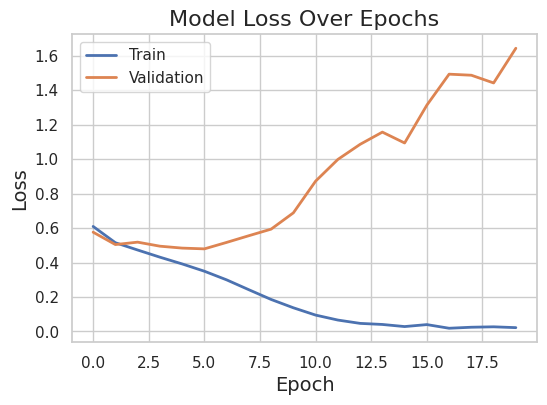

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Train', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)

# Personalizar el título y las etiquetas de los ejes
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Añadir la leyenda en la esquina superior izquierda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

Cómo podemos observar, aunque nuestro modelo consiguió un excelente desempeño en el conjunto de entrenamiento, llegando a un total de 0.99 de Accuracy, en el conjunto de validación obtuvimos resultados bajos, lo cual puede observarse y verificarse con observar los gráficos históricos de **Accuracy** y **Pérdida**.

Para corregir esto, vamos a utilizar un método de regularización conocido como **DropOut**, el cual consiste en apagar un determinado número de neuronas, con la finalidad de que las salidas de las mismas no se ajusten tanto a los datos de entrada, y con ello tender a mejorar la generalización.

In [ ]:
### Generamos una arquitectura de entrenamiento con regularización

model = tf.keras.models.Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 25, 25, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)       

In [ ]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=valid_generator, validation_steps=50)

Epoch 1/20


<ipython-input-34-a0203ac3671f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=valid_generator, validation_steps=50)


993/993 [==============================] - 17s 15ms/step - loss: 0.6737 - accuracy: 0.5756 - val_loss: 0.6388 - val_accuracy: 0.6730
Epoch 2/20
993/993 [==============================] - 14s 14ms/step - loss: 0.6264 - accuracy: 0.6564 - val_loss: 0.6074 - val_accuracy: 0.6850
Epoch 3/20
993/993 [==============================] - 14s 14ms/step - loss: 0.6053 - accuracy: 0.6772 - val_loss: 0.5871 - val_accuracy: 0.6940
Epoch 4/20
993/993 [==============================] - 14s 14ms/step - loss: 0.5804 - accuracy: 0.6992 - val_loss: 0.5583 - val_accuracy: 0.7190
Epoch 5/20
993/993 [==============================] - 13s 13ms/step - loss: 0.5658 - accuracy: 0.7091 - val_loss: 0.5406 - val_accuracy: 0.7410
Epoch 6/20
993/993 [==============================] - 14s 14ms/step - loss: 0.5486 - accuracy: 0.7241 - val_loss: 0.5357 - val_accuracy: 0.7420
Epoch 7/20
993/993 [==============================] - 13s 13ms/step - loss: 0.5401 - accuracy: 0.7308 - val_loss: 0.5191 - val_accuracy: 0.7640
Epo

KeyboardInterrupt: ignored

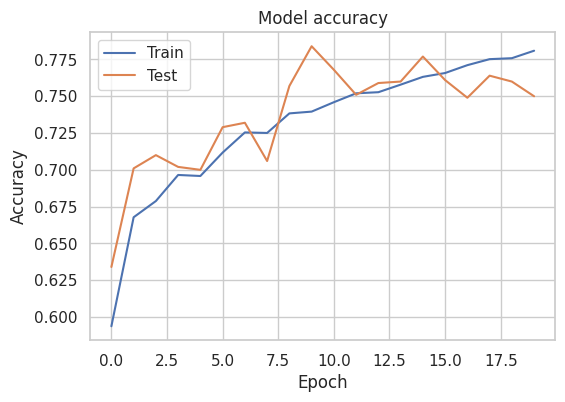

In [ ]:
# Imprimimos el Accuracy a lo largo de las epocas

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

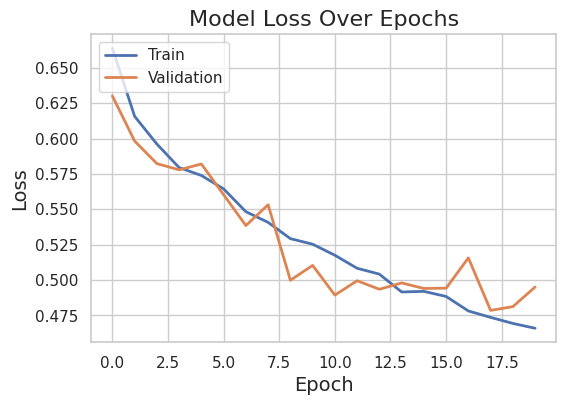

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Train', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)

# Personalizar el título y las etiquetas de los ejes
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Añadir la leyenda en la esquina superior izquierda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

Ahora podemos observar que el modelo mejoró su desempeño en el conjunto de validación comparado con respecto a , esto debido a que integramos el DropOut dentro de las capas de la red neuronal. Sin embargo, el modelo sigue sin conseguir buenos resultados a nivel global, para esto, vamos a incrementar la complejidad del modelo agregando más capas.

In [ ]:
### Generamos una arquitectura de entrenamiento con regularización

model = tf.keras.models.Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation= tf.nn.relu))
model.add(Dropout(0.3))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 25, 25, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 25, 25, 16)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 13, 13, 32)       

In [ ]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=valid_generator, validation_steps=50)

Epoch 1/20


<ipython-input-61-a0203ac3671f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=valid_generator, validation_steps=50)


993/993 [==============================] - 15s 14ms/step - loss: 0.6685 - accuracy: 0.5826 - val_loss: 0.6126 - val_accuracy: 0.6960
Epoch 2/20
993/993 [==============================] - 13s 13ms/step - loss: 0.6133 - accuracy: 0.6669 - val_loss: 0.5601 - val_accuracy: 0.7350
Epoch 3/20
993/993 [==============================] - 13s 13ms/step - loss: 0.5733 - accuracy: 0.7039 - val_loss: 0.5638 - val_accuracy: 0.6960
Epoch 4/20
993/993 [==============================] - 13s 13ms/step - loss: 0.5403 - accuracy: 0.7276 - val_loss: 0.4763 - val_accuracy: 0.7680
Epoch 5/20
993/993 [==============================] - 13s 13ms/step - loss: 0.5148 - accuracy: 0.7494 - val_loss: 0.4587 - val_accuracy: 0.7860
Epoch 6/20
993/993 [==============================] - 12s 12ms/step - loss: 0.4955 - accuracy: 0.7598 - val_loss: 0.4570 - val_accuracy: 0.7970
Epoch 7/20
993/993 [==============================] - 13s 13ms/step - loss: 0.4826 - accuracy: 0.7711 - val_loss: 0.4334 - val_accuracy: 0.7860
Epo

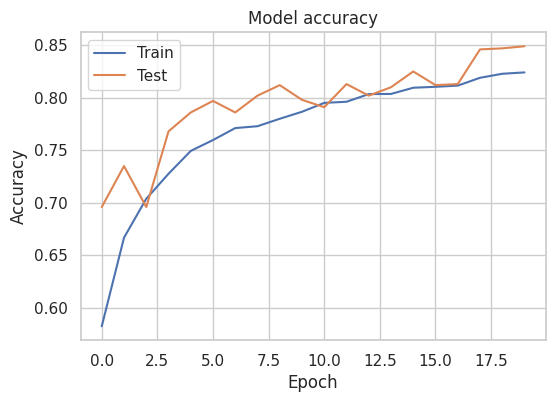

In [ ]:
# Imprimimos el Accuracy a lo largo de las epocas

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

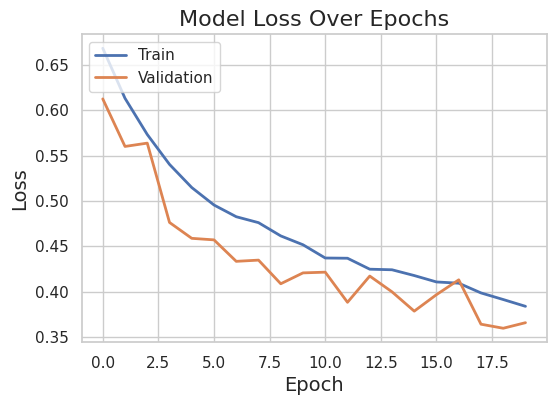

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Train', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)

# Personalizar el título y las etiquetas de los ejes
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Añadir la leyenda en la esquina superior izquierda
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

### Incluimos Data Augmentation


In [ ]:
## Definimos los generator de
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                    validation_split= 0.2,
                                                                    fill_mode  = "nearest",
                                                                    horizontal_flip=True,
                                                                    rotation_range = 25,
                                                                    width_shift_range=0.2,
                                                                    height_shift_range=0.2)


train_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
valid_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')


Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [ ]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator_aug, epochs=20, validation_data=valid_generator_aug, validation_steps=50)

Epoch 1/20


<ipython-input-75-c5b70cf37280>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator_aug, epochs=20, validation_data=valid_generator_aug, validation_steps=50)


993/993 [==============================] - 26s 25ms/step - loss: 0.6912 - accuracy: 0.5201 - val_loss: 0.6808 - val_accuracy: 0.5610
Epoch 2/20
993/993 [==============================] - 24s 24ms/step - loss: 0.6780 - accuracy: 0.5759 - val_loss: 0.6646 - val_accuracy: 0.6060
Epoch 3/20
993/993 [==============================] - 24s 24ms/step - loss: 0.6724 - accuracy: 0.5859 - val_loss: 0.6637 - val_accuracy: 0.6080
Epoch 4/20
993/993 [==============================] - 22s 22ms/step - loss: 0.6674 - accuracy: 0.5953 - val_loss: 0.6781 - val_accuracy: 0.5690
Epoch 5/20
993/993 [==============================] - 24s 24ms/step - loss: 0.6584 - accuracy: 0.6069 - val_loss: 0.6482 - val_accuracy: 0.6150
Epoch 6/20
993/993 [==============================] - 24s 24ms/step - loss: 0.6472 - accuracy: 0.6248 - val_loss: 0.6374 - val_accuracy: 0.6650
Epoch 7/20
993/993 [==============================] - 24s 24ms/step - loss: 0.6355 - accuracy: 0.6408 - val_loss: 0.6309 - val_accuracy: 0.6610
Epo

# 2.0 Redes Recurrentes

Las resdes Recurrentes son una arquitectura de red neuronal especializada y diseñada para trabajar con datos secuenciales, como por ejemplo, series de tiempo.

La idea central detras de las redes recurrentes es que mantienen una memoria interna, lo cual permite recordar información anterior a medida que procesa la nueva.

El problema con este tipo de redes es que tienen complegidad a la hora de manejar secuencias de tiempo grandes, por lo que se conoce como *desvanecimiento del gradiente.*

Con la finalidad de abordar este problema surgieron las redes **LSTM (del inglés, Long Short Term Memory)** y **GRU (Gated Recurrent Unit)**, las cuales mejoran la capacidad de las redes para aprender y retener patrones a largo plazo.



In [ ]:
## Importamos las bibliotecas necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 2.1 Preprocesamiento de datos

In [ ]:
# Cargar el conjunto de datos

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
## Transformación de columna Month a formato Datetime

df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

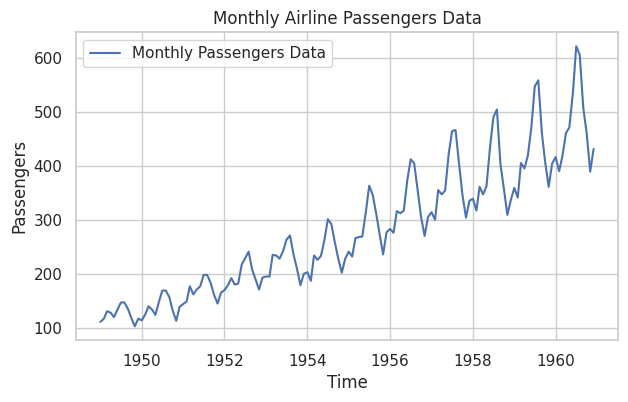

In [ ]:
# Visualizar el conjunto de datos
plt.figure(figsize=(7, 4))
plt.plot(df.index, df['Passengers'], label='Monthly Passengers Data')
plt.title('Monthly Airline Passengers Data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
# Normalizamos los datos para tenerlos en un rango de 0 y 1

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(np.array(df).reshape(-1, 1))

In [ ]:
# Función para crear secuencias y etiquetas para el modelo
# Según los datos ingresados, recorre el arreglo según la longitud del mismo
# Con la finalidad de crear secuencias del tamaño incresado, mientrás que la
# etiqueta es el número posterior a la secuencia.

def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [ ]:
# Define la longitud de la secuencia
sequence_length = 12  # Utilizamos datos de los últimos 12 meses para predecir el siguiente

X, y = create_sequences(data, sequence_length)

In [ ]:
# Se crea un conjunto de datos X en un formato vector columna  con 132 arregos de 12 elementos e

print("X = ", X.shape)
print("y = ", y.shape)

X =  (132, 12, 1)
y =  (132, 1)


In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba

train_size = int(len(data) * 0.8)                  # 20% para el conjunto de prueba
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)

X_train =  (115, 12, 1)
X_test =  (17, 12, 1)


In [ ]:
# Reshape de los datos para el modelo LSTM

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### 2.2 Construcción de arquitectura y entrenamiento del modelo

In [ ]:
# Construye el modelo LSTM con múltiples capas recurrentes
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrena el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 5s 7ms/step - loss: 0.1052
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0512
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0194
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0116
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [ ]:
# Realiza predicciones en los datos de prueba
predictions = model.predict(X_test)

# Invierte la normalización de los datos
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

1/1 [==============================] - 1s 520ms/step
Mean Squared Error: 4236.556145824437


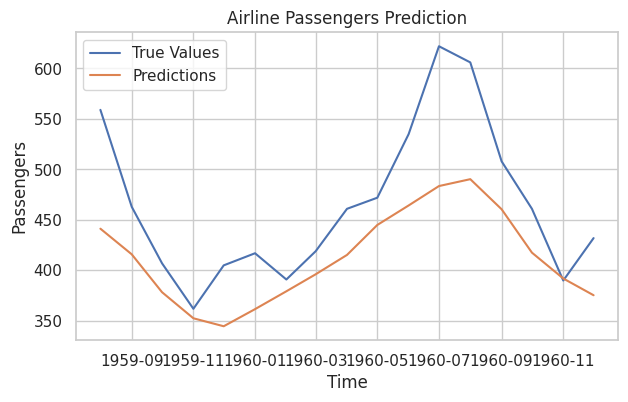

In [ ]:
# Visualiza los resultados

plt.figure(figsize=(7, 4))
plt.plot(df.index[train_size + sequence_length:], y_test, label='True Values')
plt.plot(df.index[train_size + sequence_length:], predictions, label='Predictions')
plt.title('Airline Passengers Prediction')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

### 3.0 Agregar más capas a la red LSTM

In [ ]:
# Define la longitud de la secuencia
sequence_length = 12  # Utilizamos datos de los últimos 12 meses para predecir el siguiente

# Crea secuencias y etiquetas para entrenamiento y prueba
X, y = create_sequences(data, sequence_length)

train_size = int(len(data) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Construye el modelo LSTM con múltiples capas recurrentes
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))


Epoch 1/100
4/4 [==============================] - 6s 10ms/step - loss: 0.1170
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0211
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 13/100
4/4 [==============================] - 0s 8ms/s

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entrena el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

In [ ]:
# Realiza predicciones en los datos de prueba
predictions = model.predict(X_test)

# Invierte la normalización de los datos
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

1/1 [==============================] - 1s 885ms/step
Mean Squared Error: 5611.210071954657


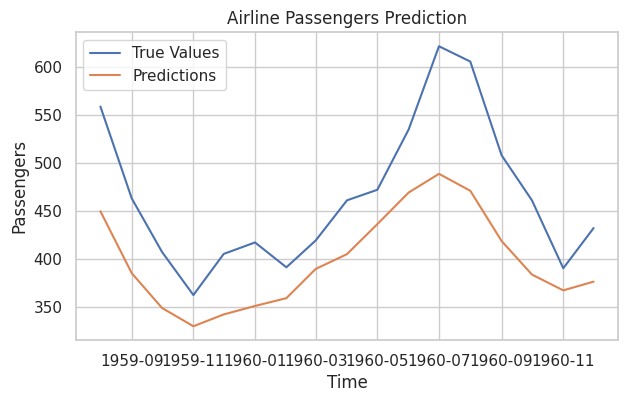

In [ ]:
# Visualiza los resultados

plt.figure(figsize=(7, 4))
plt.plot(df.index[train_size + sequence_length:], y_test, label='True Values')
plt.plot(df.index[train_size + sequence_length:], predictions, label='Predictions')
plt.title('Airline Passengers Prediction')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()